# _Set Up_

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# import libraries
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import random
import os
from pathlib import Path

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
path = os.getcwd()
path

'/Users/joeai/Springboard/unit17-take-home-challenges/ultimate_technologies'

# _Load in Data_

In [4]:
from ultimate_challenge import analysis

df = analysis.load_data(path)
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
count    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB


# _Data Prep_

In [6]:
resample_df = analysis.data_prep(df)

In [7]:
resample_df.head()

,count,time
login_time,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00
1970-01-01 20:15:00,6,1970-01-01 20:15:00
1970-01-01 20:30:00,9,1970-01-01 20:30:00
1970-01-01 20:45:00,7,1970-01-01 20:45:00
1970-01-01 21:00:00,1,1970-01-01 21:00:00


In [8]:
resample_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 2 columns):
count    9788 non-null int64
time     9788 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 229.4 KB


# _Extract Date Info from `login-df`_

In [9]:
logins_df = analysis.extract_data_info(resample_df)
logins_df.head()

,count,time,month,day,hour,week,weekday
login_time,,,,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,1,1,20,1,3
1970-01-01 20:15:00,6,1970-01-01 20:15:00,1,1,20,1,3
1970-01-01 20:30:00,9,1970-01-01 20:30:00,1,1,20,1,3
1970-01-01 20:45:00,7,1970-01-01 20:45:00,1,1,20,1,3
1970-01-01 21:00:00,1,1970-01-01 21:00:00,1,1,21,1,3


Grouping by Month
month
1    21239
2    24673
3    33723
4    13507
Name: count, dtype: int64
------------------------------


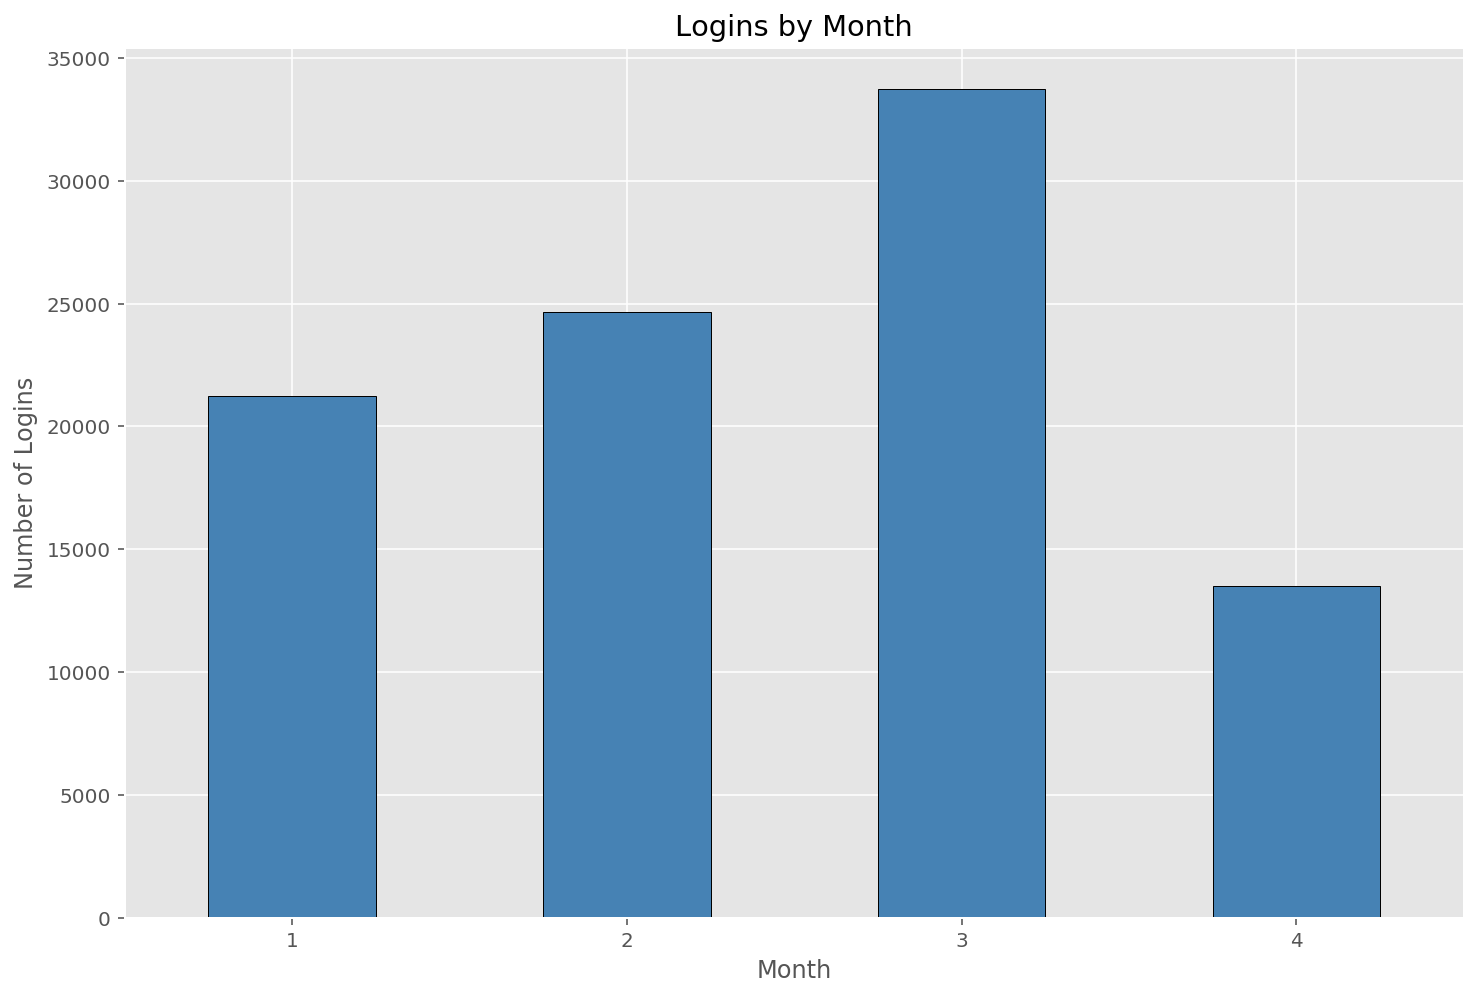

In [10]:
analysis.groupby_plot(logins_df, 'month')

# _Observations: Logins by Month_

The graph above gives us an excellent high-level overview of the breakdown of logins by month. It looks like logins steadily increased until the third month, and then dropped off rather suddenly in the fourth month. After further investigation, we found that observations for April only went until the 13th of the month. Now the steep drop-off makes sense. 

Next, we'll look at a weekly breakdown of the number of logins.

Grouping by Week
week
1     2374
2     5217
3     5023
4     4751
5     4744
6     5572
7     5915
8     7035
9     6554
10    7398
11    7338
12    8955
13    7285
14    8095
15    6491
16     395
Name: count, dtype: int64
------------------------------


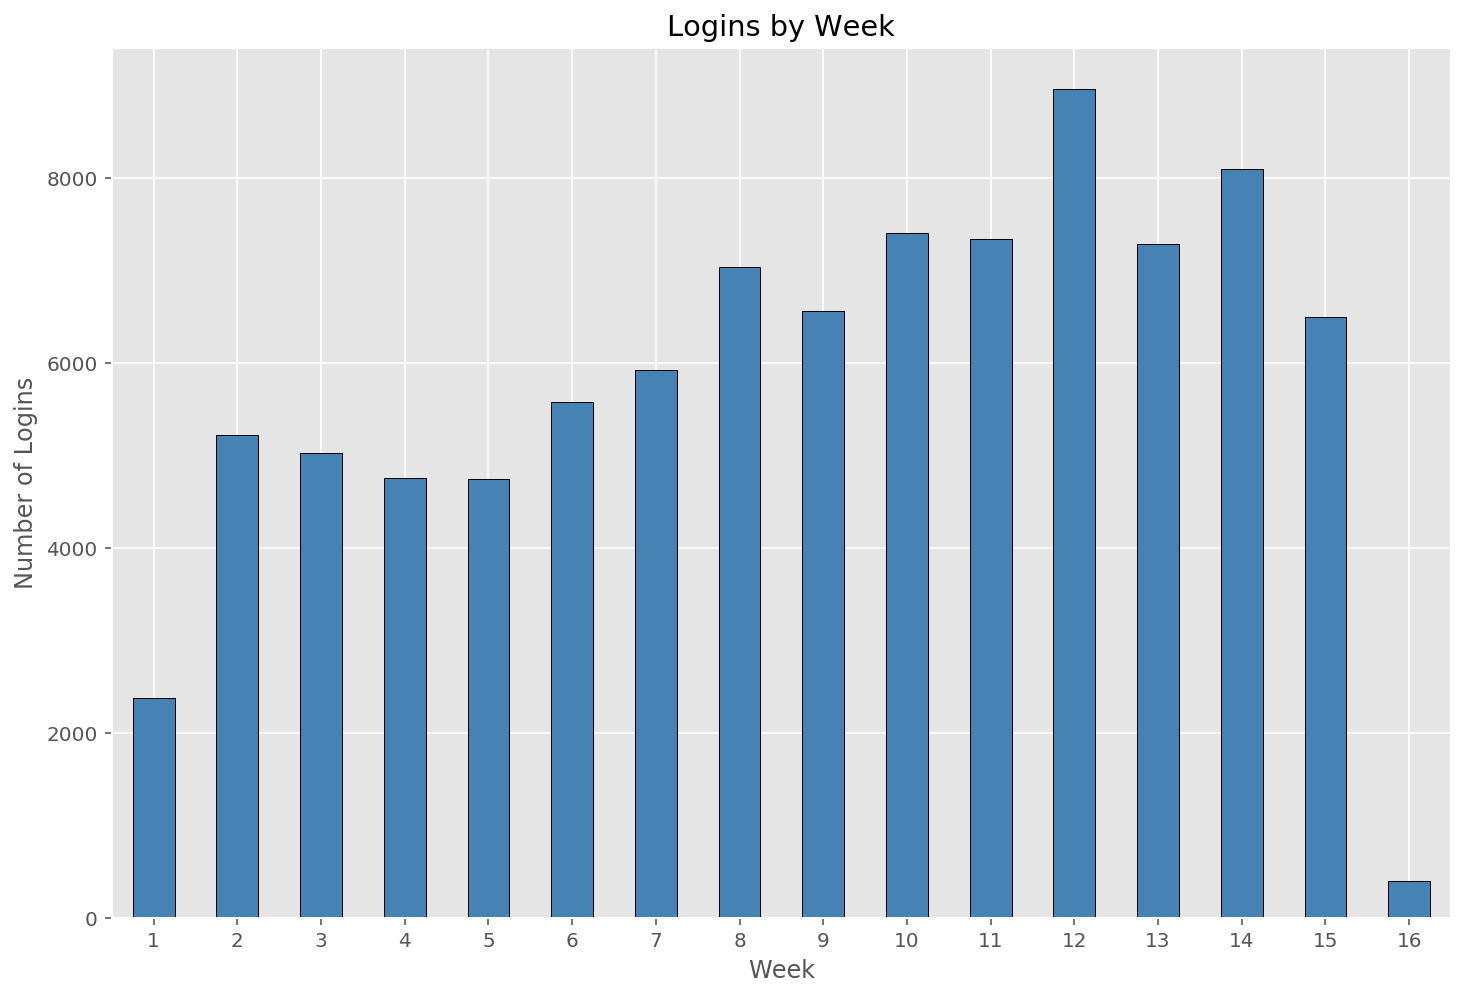

In [11]:
analysis.groupby_plot(logins_df, 'week')

# _Observations: Logins by Week_

The above graph, which shows the sum of logins by week, trends with the month graph from earlier; at about week 5, the number of logins steadily increases until its peak at week 12. Week 5 to week 12 encompasses months 2 and 3, and while it gives us a little more nuanced information, this graph reasserts our previous statement that there was a steady increase from month one until month 3. 

Next, we'll take a look at the daily breakdown which will aggregate the number of logins on a day-by-day basis, regardless of the month or week. 

Grouping by Day
day
1     3194
2     3044
3     3475
4     4037
5     3223
6     3281
7     4006
8     4019
9     2832
10    3297
11    3863
12    3614
13    3021
14    3426
15    3331
16    2215
17    3044
18    2945
19    2859
20    2885
21    3487
22    3507
23    2233
24    2318
25    2348
26    2176
27    2735
28    3540
29    2197
30    1415
31    1575
Name: count, dtype: int64
------------------------------


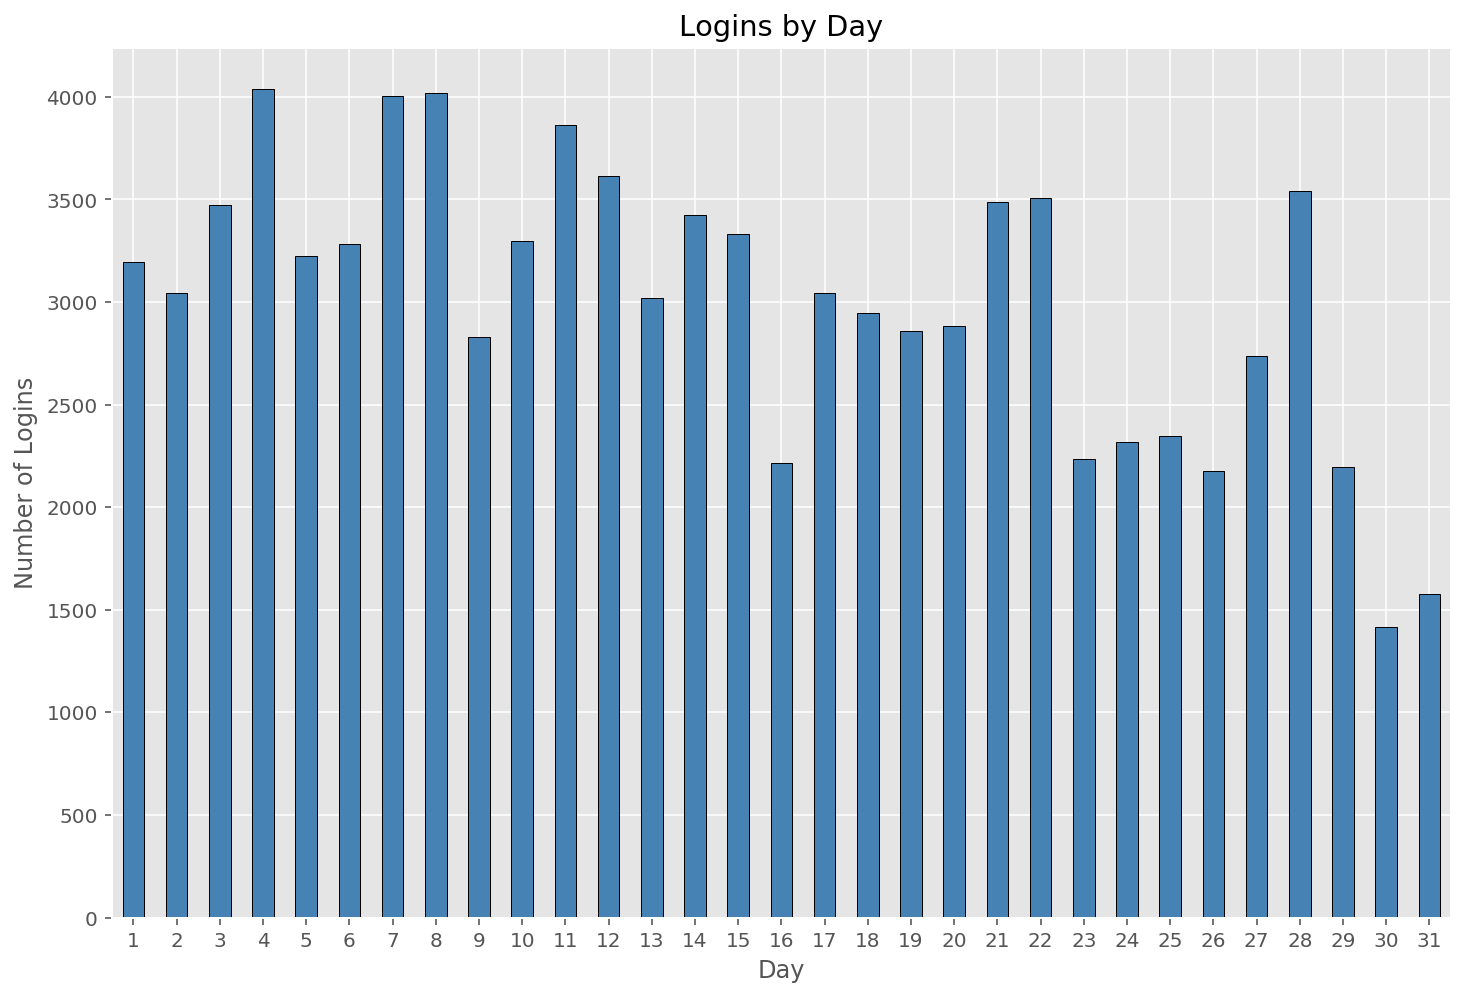

In [12]:
analysis.groupby_plot(logins_df, 'day')

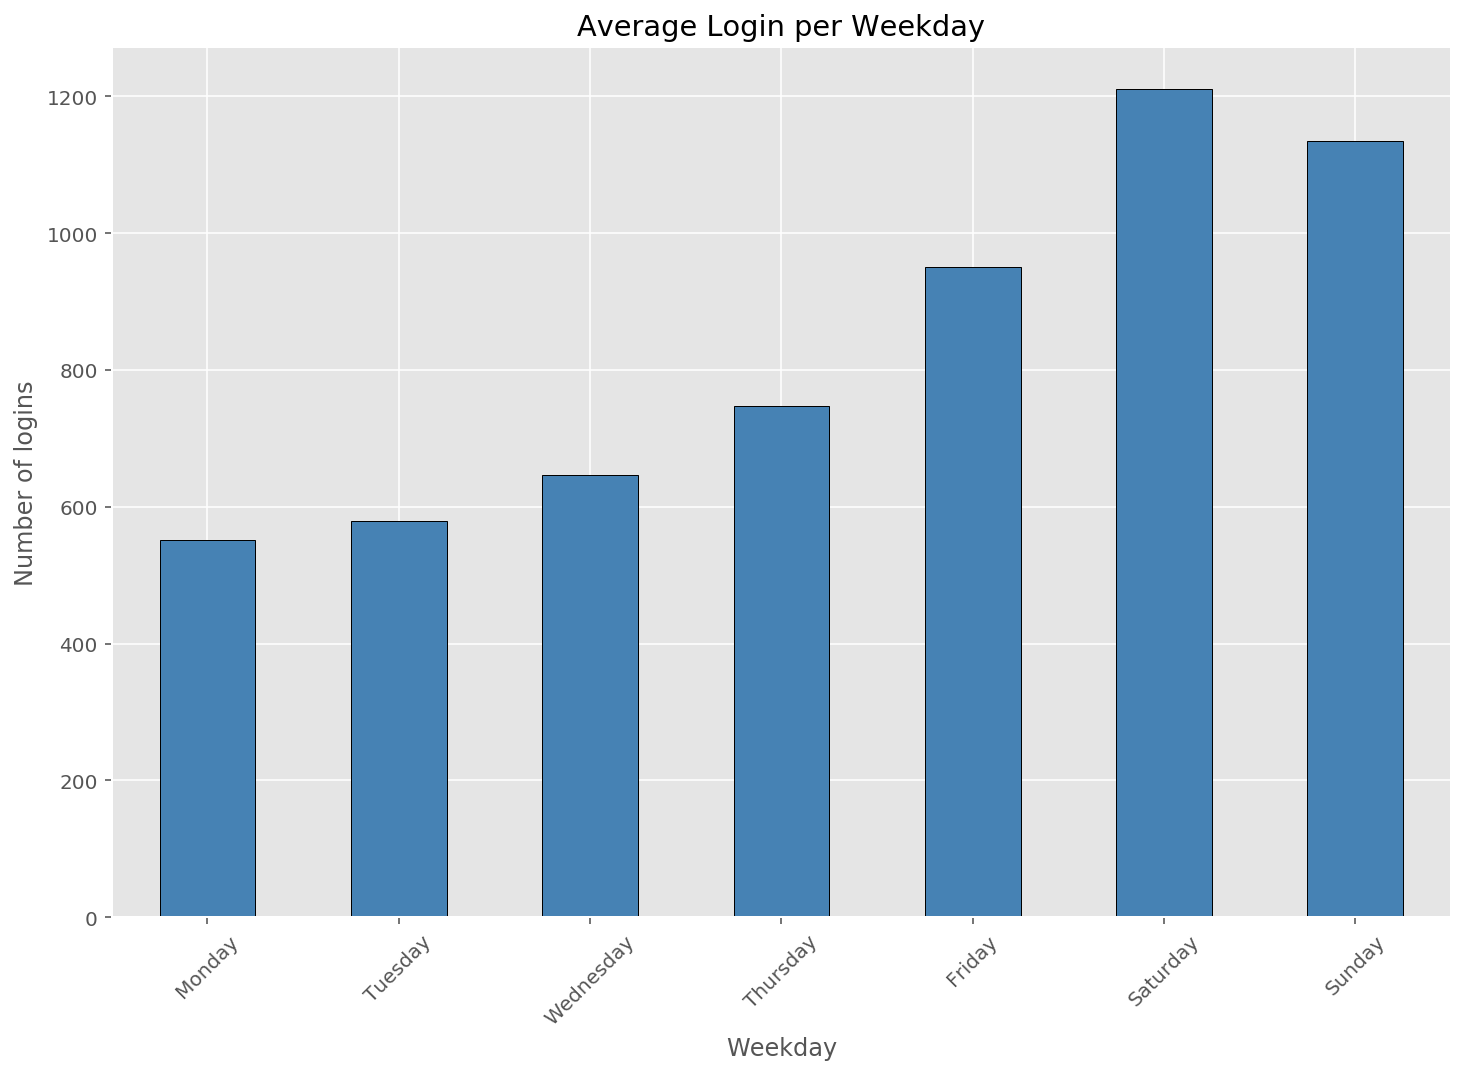

In [13]:
analysis.groupby_plot(logins_df, 'day', weekday=True)

# _Observations: Logins by day_

The first graph shows the breakdown of logins each day within any given month. In other words, it sums the total number of logins on the 1st of every month, 2nd of every month, etc. 

The first insight is that there appears to be general downtrend in that there are more logins earlier in the month versus later in the month. 

Secondly, there appears to be a 'double-spike' in the number of logins at a pretty consistent time interval (i.e., every ~5 days). A hypothesis for this spike might be that these particular days might have fallen more often on weekends, where ridership levels tend to be higher. 

Now the second graph takes a slightly different approach and shows the average based on the day of the week. Overall the results are not too surprising in that we see a steady rise in logins as the weekend approaches. Then on Saturday and Sunday, we have the highest number of average logins per a weekly basis.

# _Daily Trends_

In [31]:
# create dataframe that shows login count by dat
day_df = analysis.resample_df(df, 'D')
day_df.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


In [32]:
# add data and weekday column
day_df['date'] = pd.to_datetime(day_df.index)
day_df['weekday'] = day_df['date'].dt.weekday
day_df.head()

,count,date,weekday
login_time,,,
1970-01-01,112,1970-01-01,3
1970-01-02,681,1970-01-02,4
1970-01-03,793,1970-01-03,5
1970-01-04,788,1970-01-04,6
1970-01-05,459,1970-01-05,0


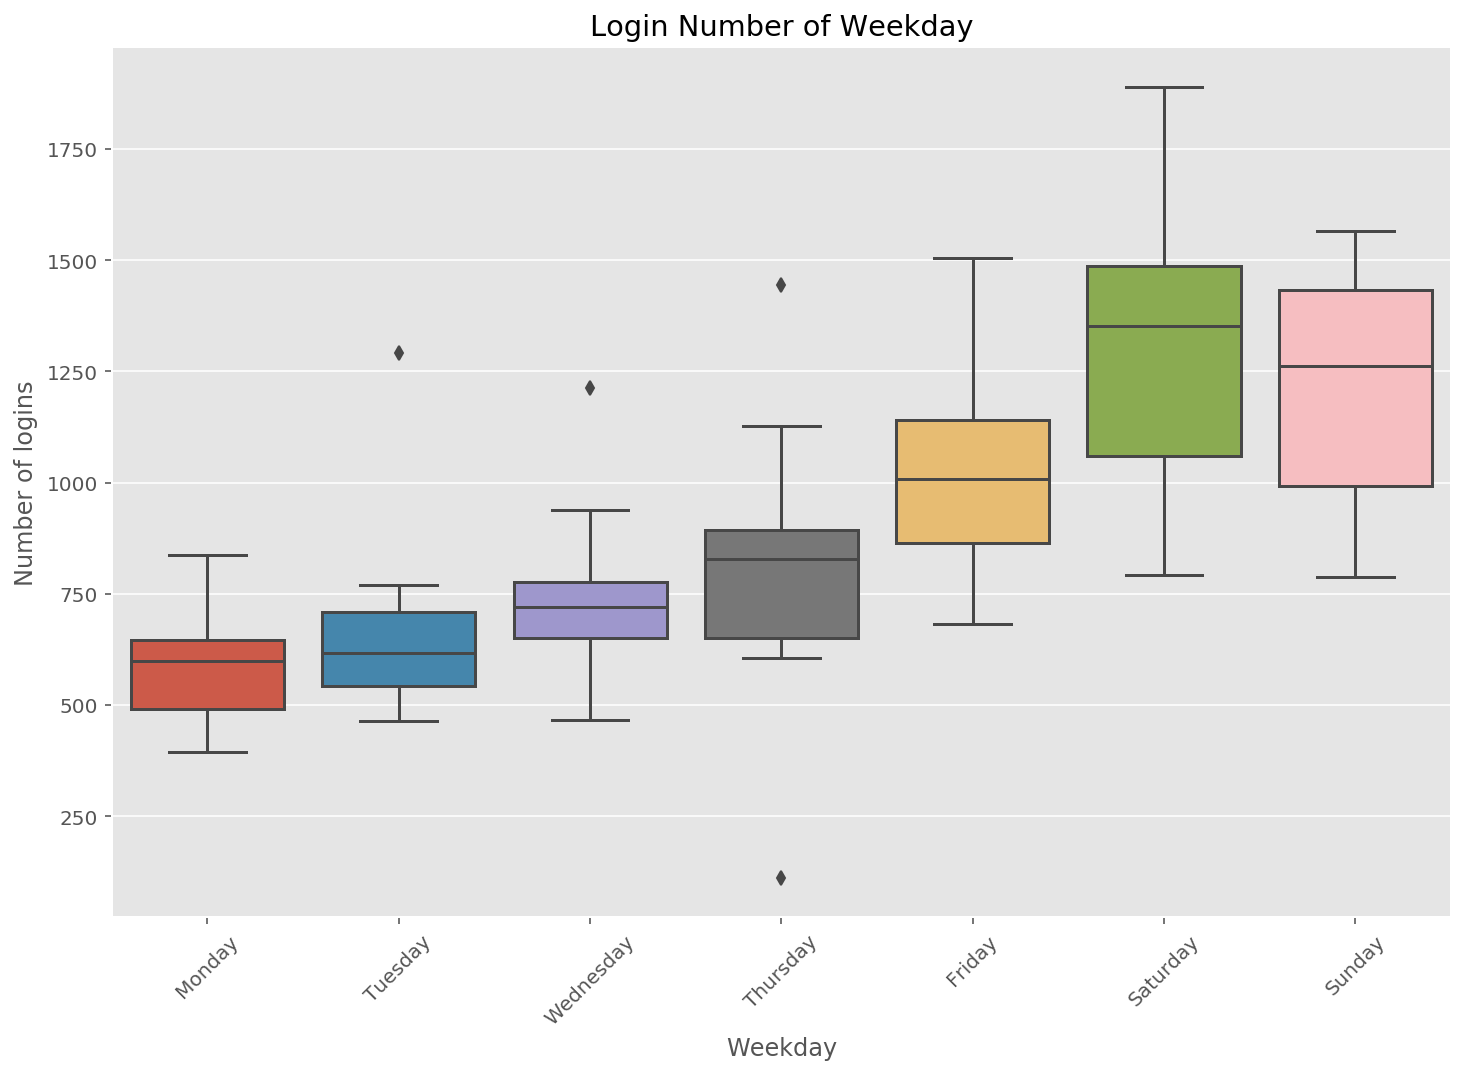

In [33]:
analysis.boxplot_graph(day_df, x = 'weekday', y = 'count', timeframe='Weekday')

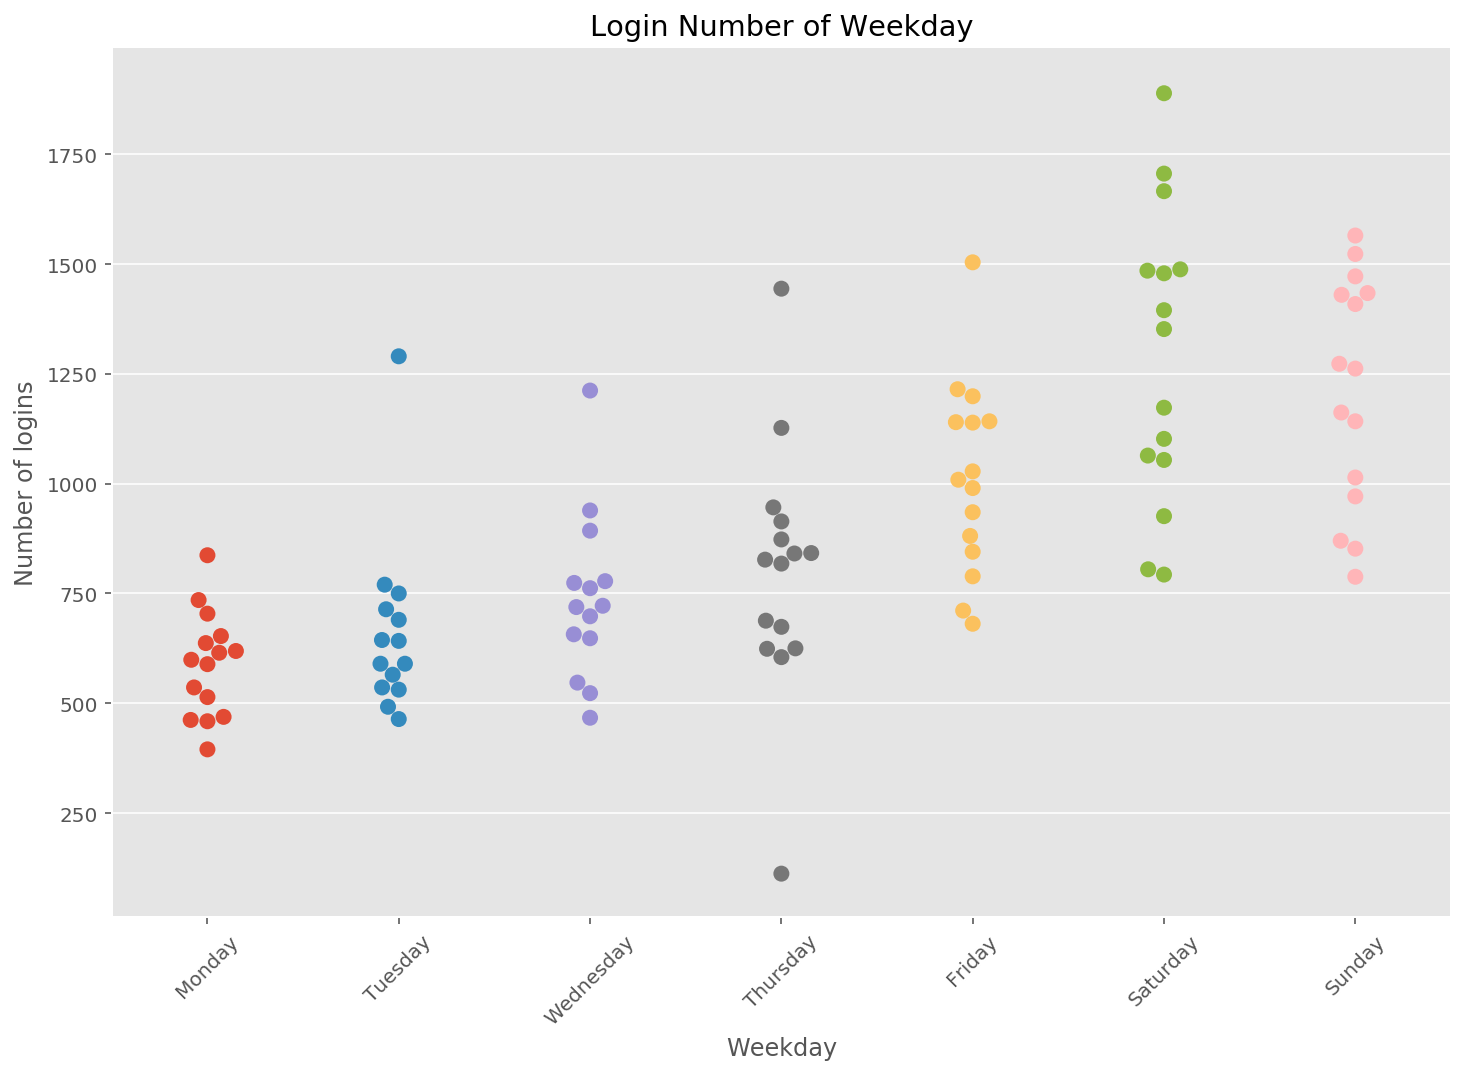

In [34]:
analysis.swarmplot_graph(day_df, x = 'weekday', y = 'count', timeframe='Weekday')

# _Observations: Weekday Boxplot/Swarmplot_

This boxplot shows a similar trend to the average login per weekday bar graph above; the number of logins gradually increases until maxing out (on average) on Saturday with Sunday being slightly less. 

However, we are able to gain a few more insights in regards to the variability of the logins. We can see that early in the week (i.e. Monday, Tuesday and Wednesday) the variability of the number of logins stayed within a relatively tight window. On Thursday, this variability of logins increases and continues to increase into the weekend. 

Additionally, there appear to be a few outliers in regards to the number of logins on Tuesday, Wednesday and Thursday (which had both an abnormally high and low observation). 

# _Logins by Hour_ 

Grouping by Hour
hour
0     5993
1     6317
2     5800
3     4831
4     5034
5     2945
6     1138
7      815
8      818
9     1527
10    3064
11    5799
12    4964
13    3611
14    3426
15    3038
16    2832
17    2584
18    2980
19    3235
20    4103
21    5623
22    6607
23    6058
Name: count, dtype: int64
------------------------------


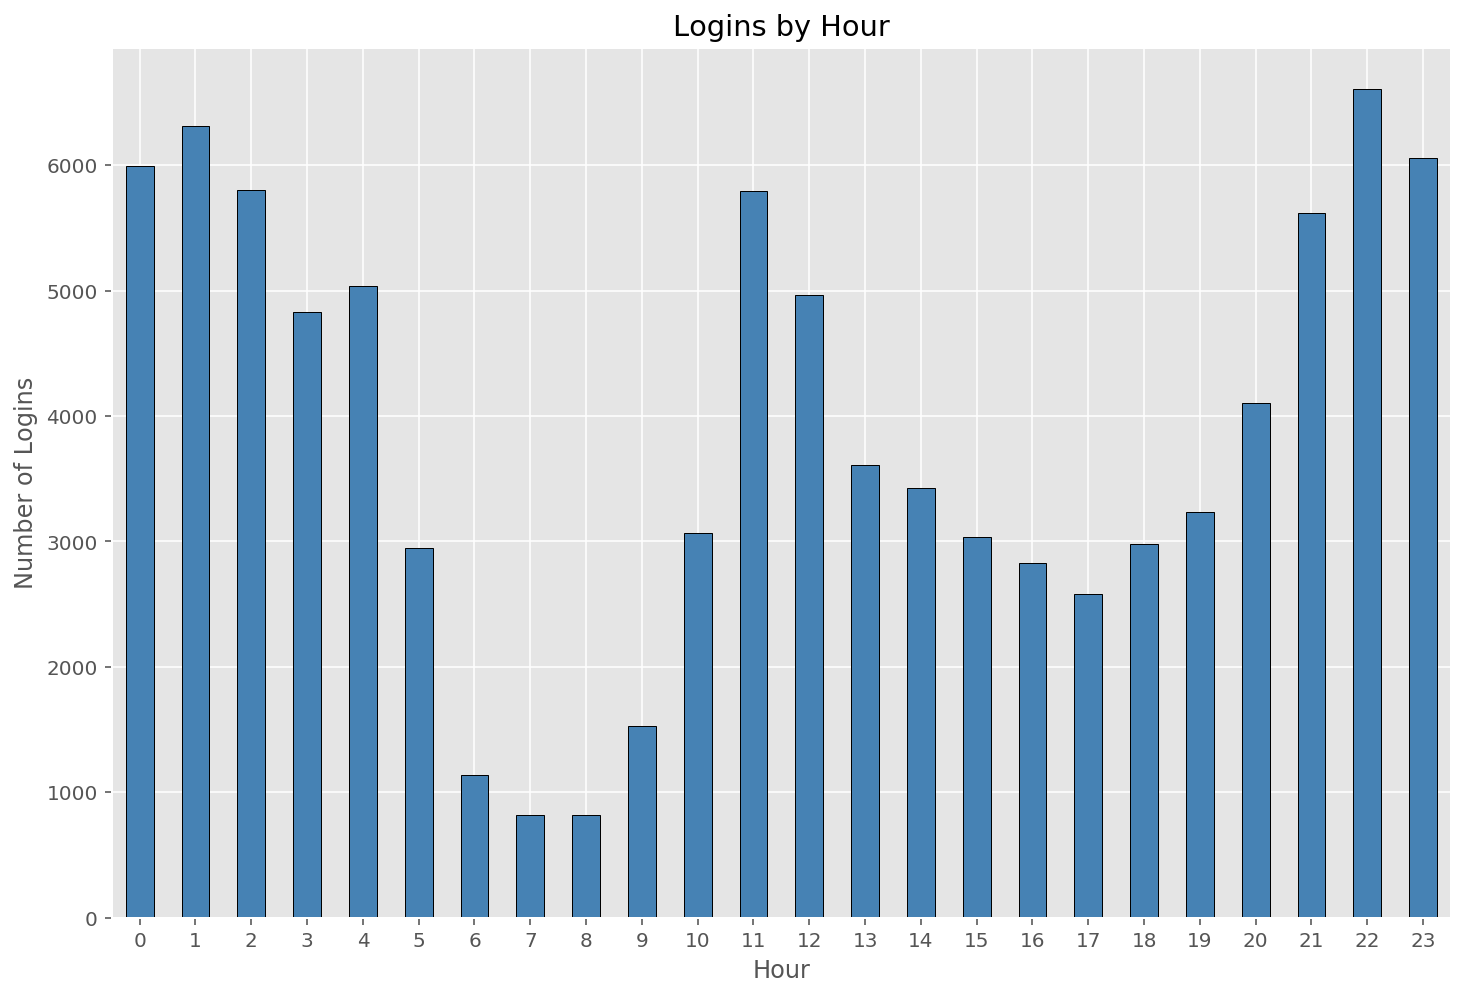

In [36]:
analysis.groupby_plot(logins_df, 'hour')

# _Observations: Hourly Logins_

This may be the most insightful graph that we've produced so far. There is a pretty clear trend with the number of logins bottoming out in the early morning and spiking around 11-12 in the afternoon (potential hypothesis: a lot of people are on lunch). After this midday spike it steadily decreases until around hour 17 (i.e. 5pm) and then quickly begins to rise again until 10pm and remains at higher levels until around hour 4 (i.e. 4am), after which it rapidly falls (potential hypothesis: bars/clubs tend to close at 2 am...). 

In [42]:
# resample based on hourly time intervals
hour_df = analysis.data_prep(df, 'H')
hour_df.head()

,count,time
login_time,,
1970-01-01 20:00:00,24,1970-01-01 20:00:00
1970-01-01 21:00:00,9,1970-01-01 21:00:00
1970-01-01 22:00:00,21,1970-01-01 22:00:00
1970-01-01 23:00:00,58,1970-01-01 23:00:00
1970-01-02 00:00:00,53,1970-01-02 00:00:00


In [44]:
hour_df = analysis.extract_data_info(hour_df)
hour_df.head()

,count,time,month,day,hour,week,weekday
login_time,,,,,,,
1970-01-01 20:00:00,24,1970-01-01 20:00:00,1,1,20,1,3
1970-01-01 21:00:00,9,1970-01-01 21:00:00,1,1,21,1,3
1970-01-01 22:00:00,21,1970-01-01 22:00:00,1,1,22,1,3
1970-01-01 23:00:00,58,1970-01-01 23:00:00,1,1,23,1,3
1970-01-02 00:00:00,53,1970-01-02 00:00:00,1,2,0,1,4


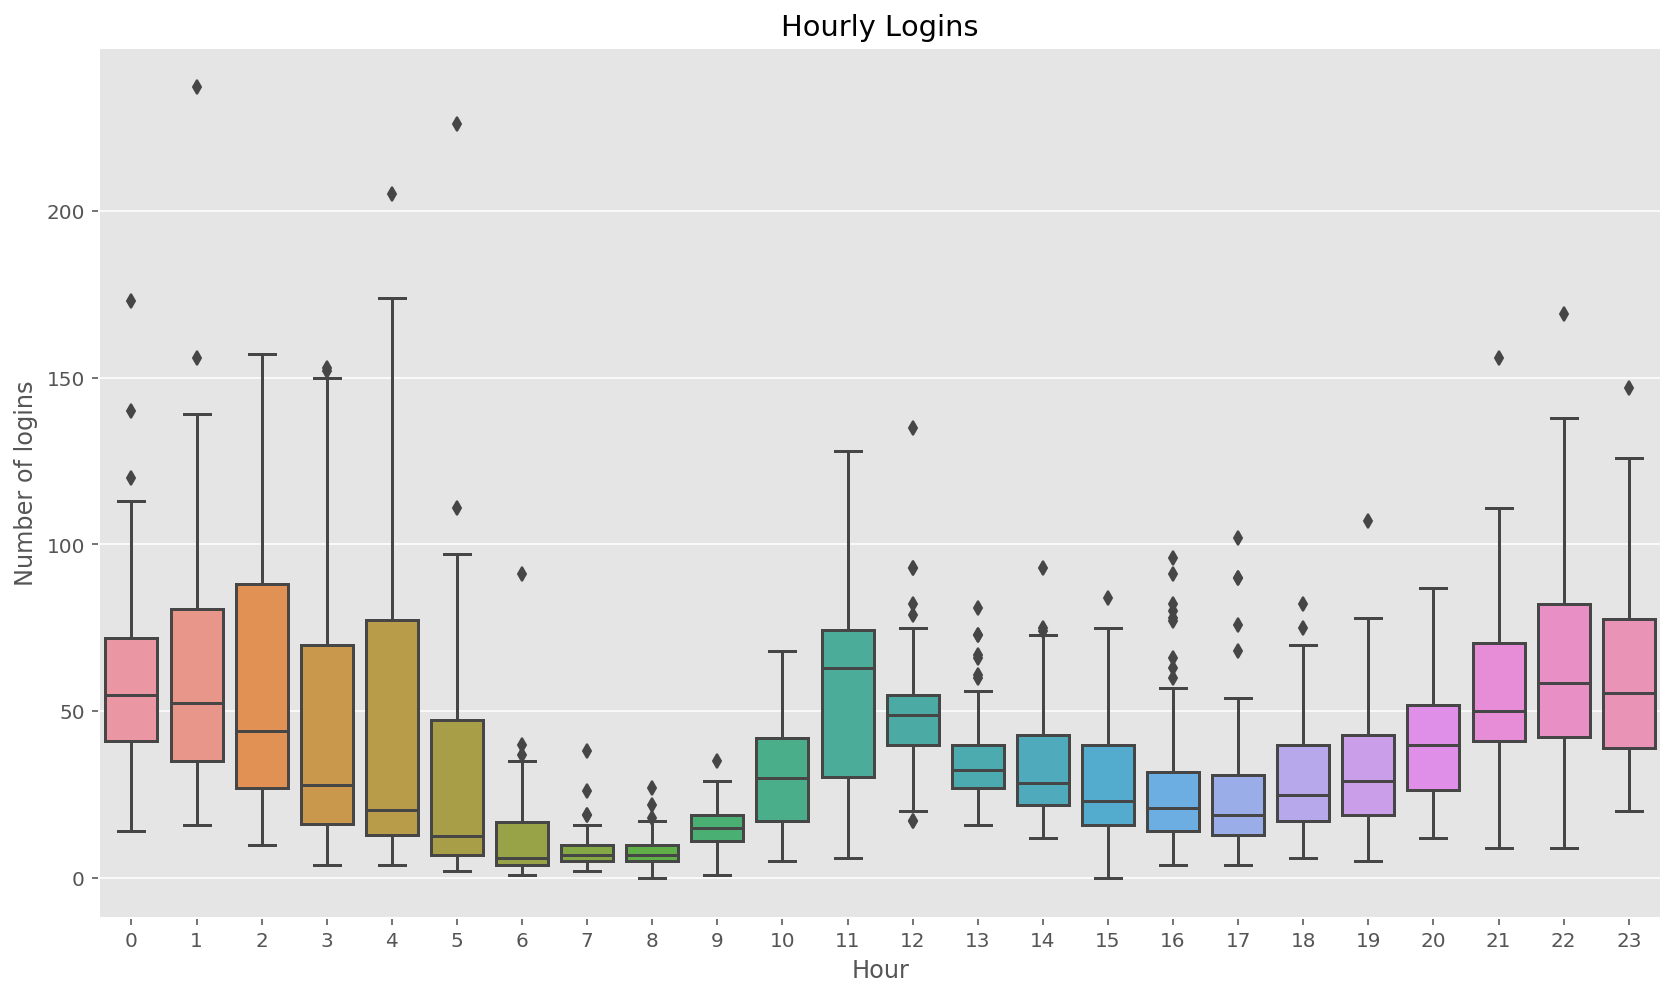

In [49]:
analysis.boxplot_graph(hour_df, x = 'hour', y = 'count', timeframe='Hourly', hourly=True)

# _Observations: Hourly Logins (cont.)_

The boxplot above gives us more information regarding the distribution of the hourly observations of logins. It trends right with the bar graph of total hourly logins above: a low number of logins in the morning, a short peak mid-day, steady decrease in the early/late afternoon with a spike around hour 20-21, after which logins remain consistently high. 

We can see above though that there is more than meets the eye when it comes to hourly logins. Most importantly, it looks as though the late-night/early morning hours (i.e., hour 20 to hour 4) have a high level of variability in their distribution. In other words, the logins per day at those particular hours are less likely to be consistent. Variables such as day of the week (weekday vs. weekend), weather, or even local events (like concerts, for example) could be having an impact. 

# _Recap: Insights Gathered from EDA_

By resampling using multiple time intervals (monthly, daily, hourly, etc.), we can capture quite a bit of information from the logins data. Most notable among them include:

- There was an upward trend in logins from the first to the third month.
- Since we only have data on the first thirteen days of the fourth month, we cannot conclusively say if this trend will continue. However, by resampling the data into a weekly time-interval, we can see that the number of logins peaks at week 12, and then looks to be trending downward in subsequent weeks. Further analysis is needed to judge the trajectory of logins in the fourth month, but from the data we have in-hand, logins appear to be decreasing. 
- From the bar graph detailing logins on the day of the month, we see a downward trend as the month progresses. It appears that earlier in the month, there are more logins with a steady decrease as the month progresses. We also have to be careful here as the data is slightly skewed as well; remember, we don't have the last half of the fourth month, so the observations from the first 13 days of the fourth month are probably contributing to that bump. 
- Somewhat unsurprisingly, logins at the beginning of the week (i.e., Monday, Tuesday, and Wednesday) remain relatively low, with only a minimal increase. This increase continues on Thursday with a sudden rise on Friday, Saturday and Sunday, who have the three highest total logins. However, from the boxplot/swarm plot, we can see that the weekends (i.e., Friday, Saturday, and Sunday) have more variability in the number of logins. It looks like there may be some variables at play here that could be impacting logins being more consistent on weekends. 
- Lastly, based on our hourly observations, we can see that there is a spike in logins during midday (hour 11-12) and another peak from about hour 20 until hour 4. However, these late-night/early morning hours tend to have higher variability, indicating the possibility that variables are affecting the number of logins at these particular hours. Also, we must make a note of the significant amount of outliers in the hour 15-17 hour range. For the most part, there is a decline in logins from hour 11 until hour 16, but these outliers indicate higher levels of logins. It'd be interesting to see what might be causing them. 